<a href="https://colab.research.google.com/github/ASWATHI-20/AI-cloudDevops-/blob/main/DAY7TASK08_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ---------------------------------------------
# Customer Churn Prediction using Ensemble Model
# Model: Random Forest (Ensemble of Decision Trees)
# ---------------------------------------------

# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [6]:
# -----------------------------------
# 1. Load Dataset
# -----------------------------------
df = pd.read_csv("/content/telecom_churn.csv")
print(df.head())

   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


In [7]:
# -----------------------------------
# 2. Encode Categorical Columns
# -----------------------------------
df = df.dropna()   # remove missing rows

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])


In [8]:
# -----------------------------------
# 3. Split Features and Target
# -----------------------------------
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# -----------------------------------
# 4. Train Ensemble Model (Random Forest)
# -----------------------------------
# n_estimators = number of trees in the forest
# max_depth = depth of each tree (None means nodes are expanded until all leaves are pure)
model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42,
    n_jobs=-1              # use all CPU cores (optional)
)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [10]:
# -----------------------------------
# 5. Evaluate Model
# -----------------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9265367316341829

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667


Confusion Matrix:
 [[556  10]
 [ 39  62]]


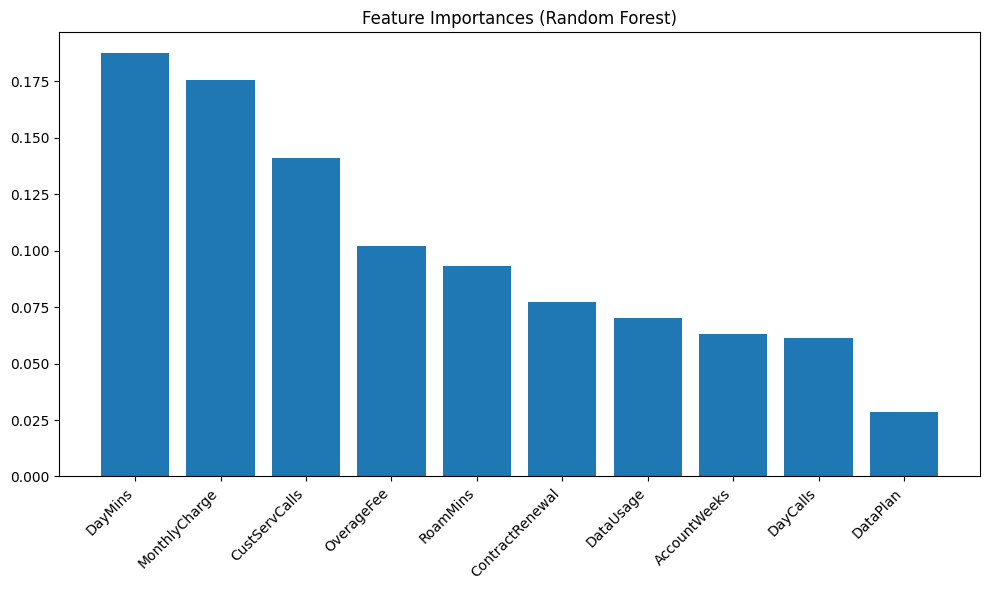

In [11]:
# -----------------------------------
# 6. Plot Feature Importances
# -----------------------------------
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]   # sort descending

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()